<a href="https://colab.research.google.com/github/SimranShaikh20/ISRO_Mining_Site_FINAL_APP/blob/main/EDA_ISRO_SPACE_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Assuming the data is in a DataFrame called 'df'
df = pd.read_csv('/content/space_mining_dataset.csv')

print(df.describe())

       distance_from_earth        iron      nickel   water_ice  \
count           999.000000  999.000000  999.000000  999.000000   
mean            528.203980   22.371874    8.049283   15.207608   
std             268.064613   10.335978    4.184687    8.747676   
min              52.428665    5.045052    1.036363    0.005952   
25%             296.752162   13.401947    4.549747    7.741339   
50%             538.013430   22.045289    7.958279   14.835617   
75%             754.018805   31.452207   11.849226   22.900207   
max             999.412140   39.966511   14.976117   29.990903   

       other_minerals  Estimated Value (B USD)  sustainability_index  \
count      999.000000               999.000000            999.000000   
mean        54.371234                55.815296             55.391004   
std         14.098095                14.062025             19.820032   
min         17.605375                15.756373             20.023555   
25%         44.584301                45.28101

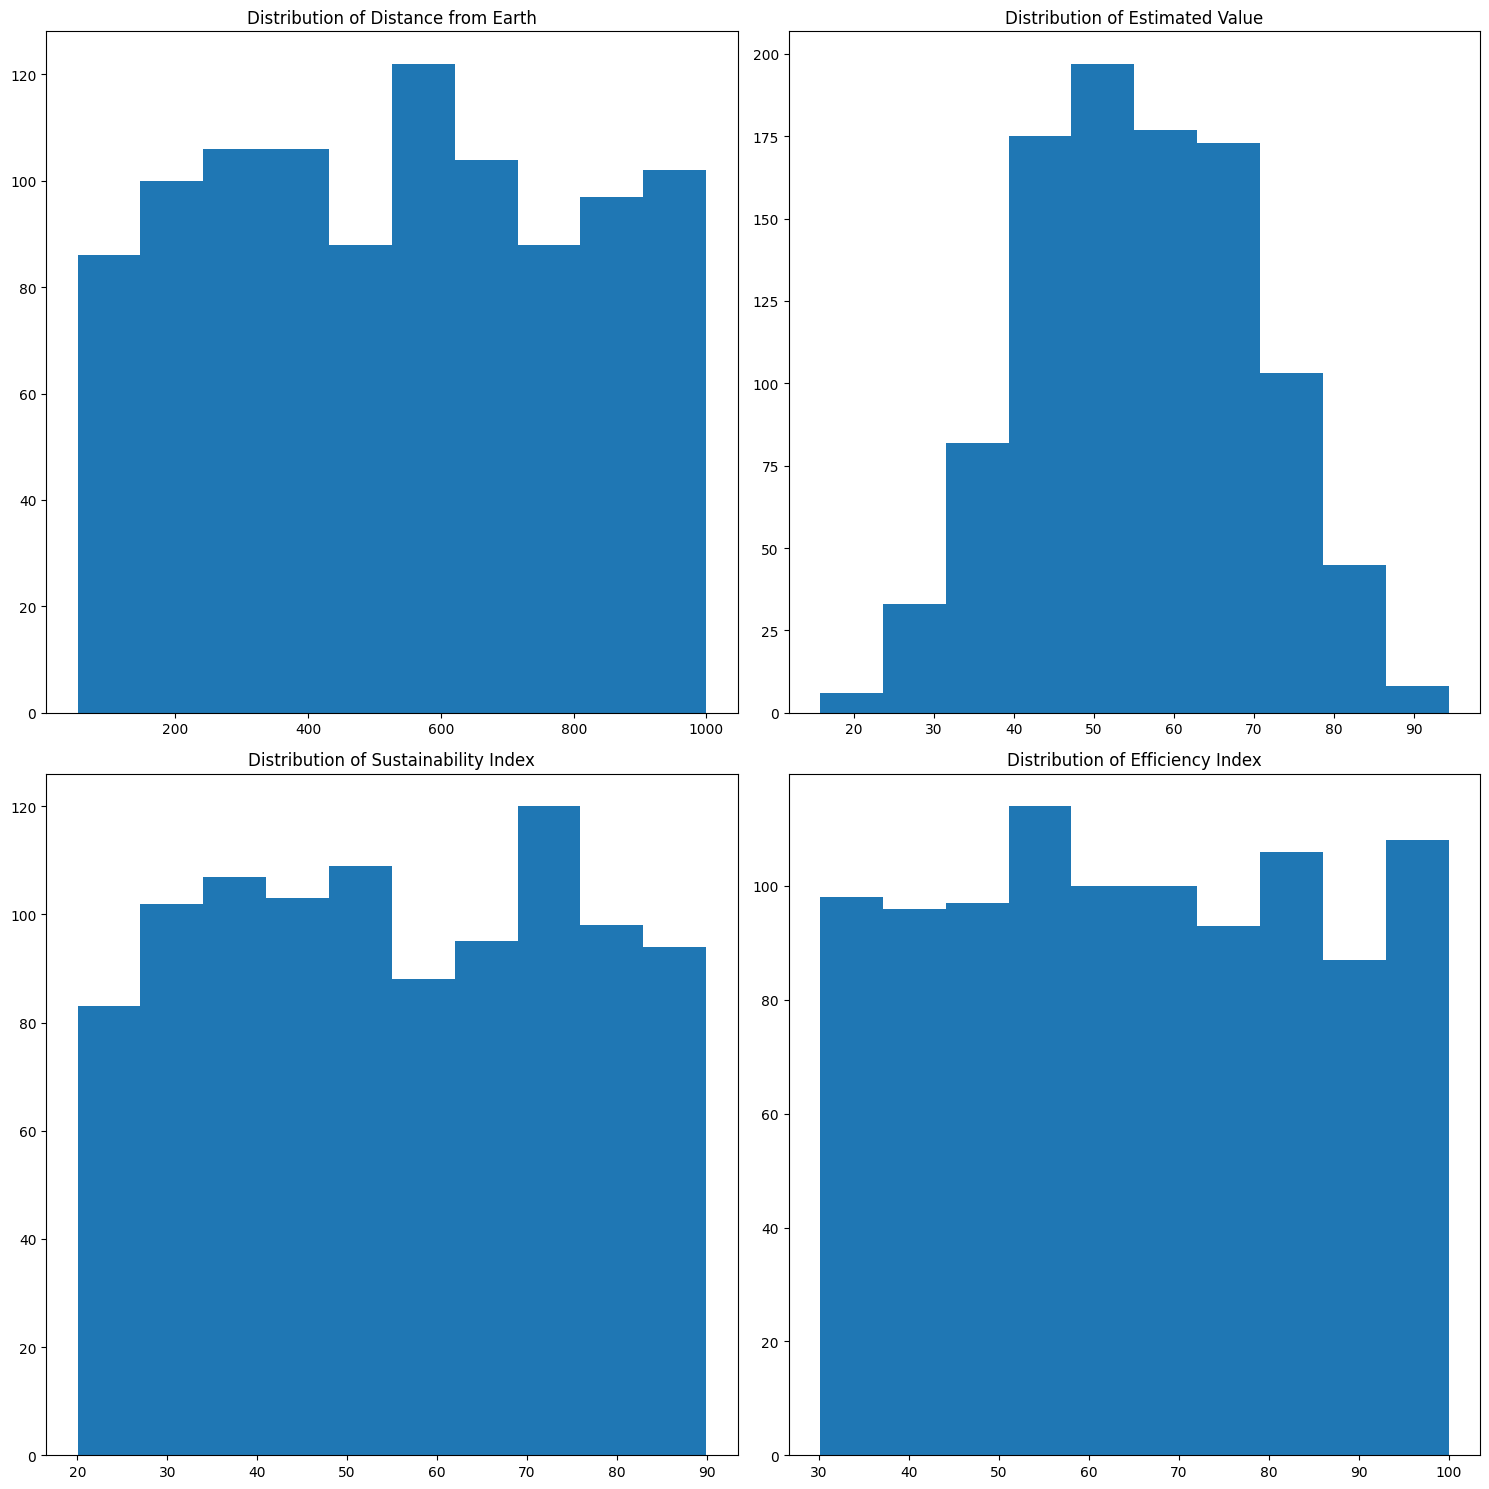

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].hist(df['distance_from_earth'])
axs[0, 0].set_title('Distribution of Distance from Earth')

axs[0, 1].hist(df['Estimated Value (B USD)'])
axs[0, 1].set_title('Distribution of Estimated Value')

axs[1, 0].hist(df['sustainability_index'])
axs[1, 0].set_title('Distribution of Sustainability Index')

axs[1, 1].hist(df['efficiency_index'])
axs[1, 1].set_title('Distribution of Efficiency Index')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

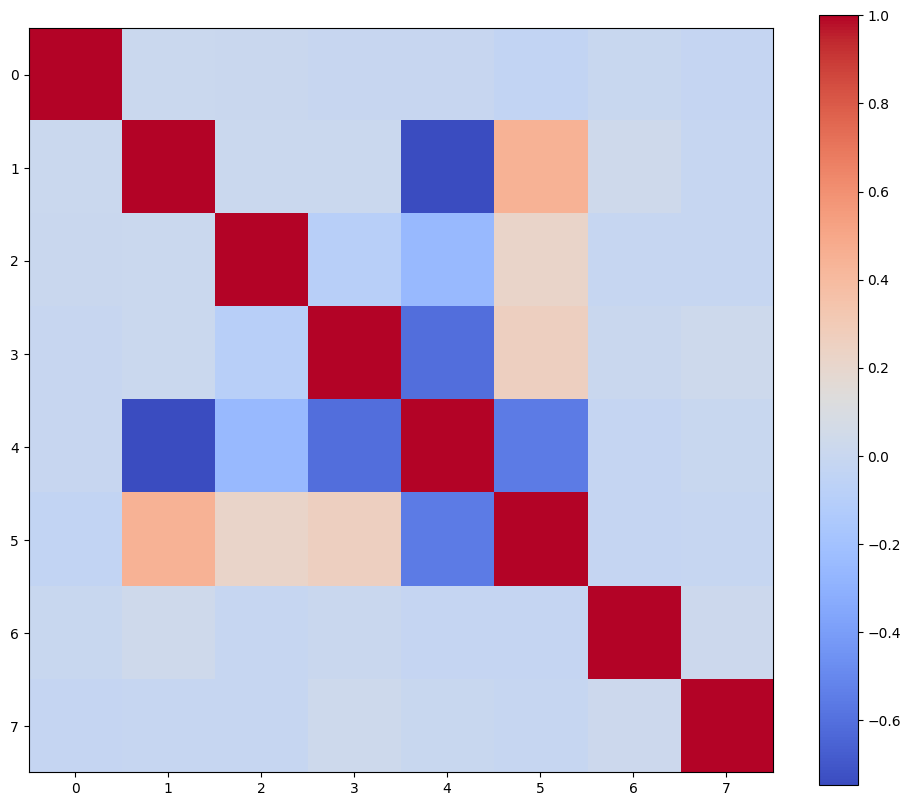

In [5]:
# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Continue with plotting the correlation matrix
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks

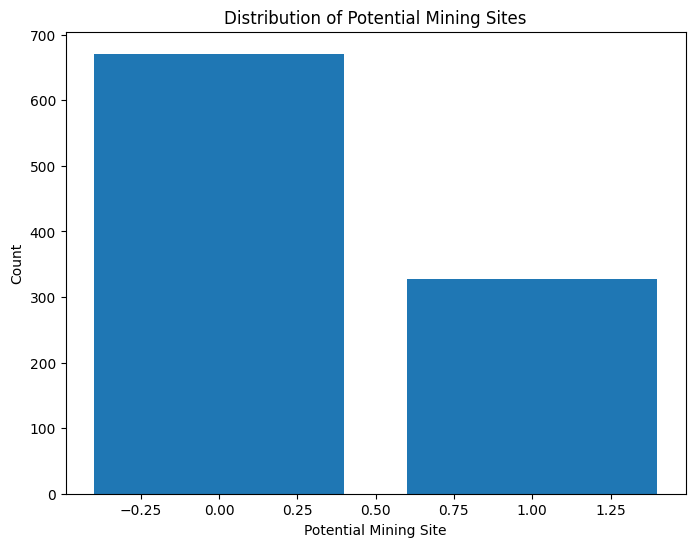

In [6]:
potential_sites = df['Potential Mining Site'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(potential_sites.index, potential_sites.values)
plt.title('Distribution of Potential Mining Sites')
plt.xlabel('Potential Mining Site')
plt.ylabel('Count')
plt.show()

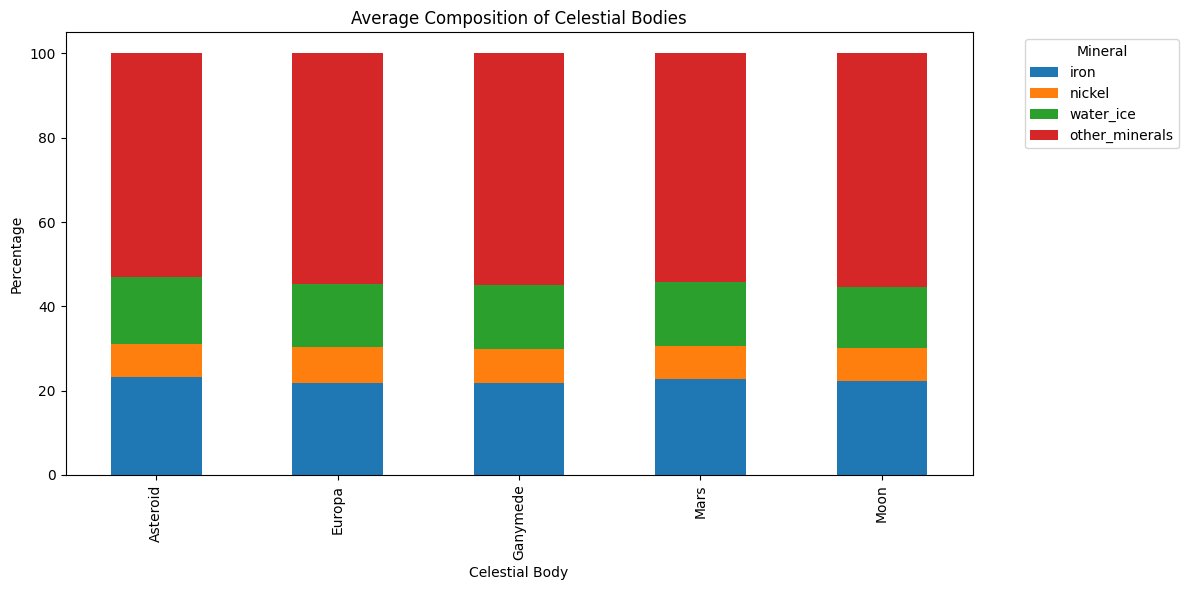

In [7]:
composition_cols = ['iron', 'nickel', 'water_ice', 'other_minerals']
composition_data = df.groupby('Celestial Body')[composition_cols].mean()

composition_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Composition of Celestial Bodies')
plt.xlabel('Celestial Body')
plt.ylabel('Percentage')
plt.legend(title='Mineral', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

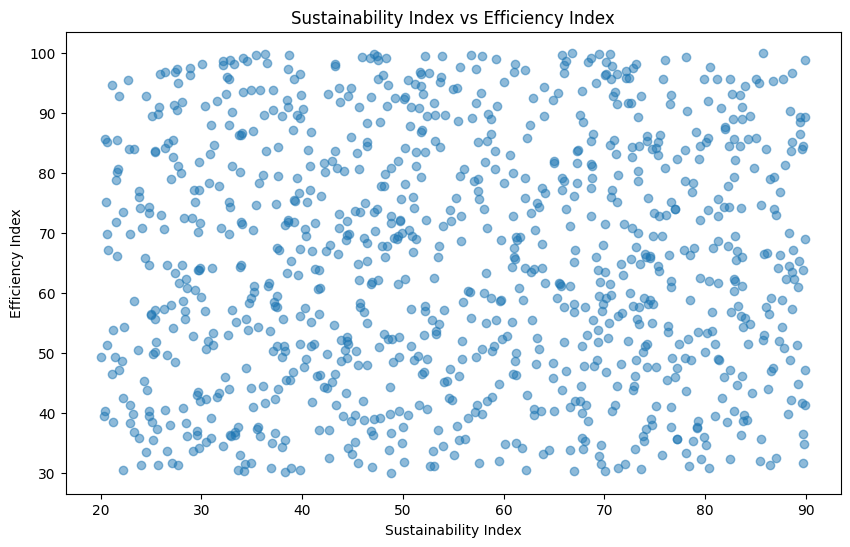

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sustainability_index'], df['efficiency_index'], alpha=0.5)
plt.title('Sustainability Index vs Efficiency Index')
plt.xlabel('Sustainability Index')
plt.ylabel('Efficiency Index')
plt.show()

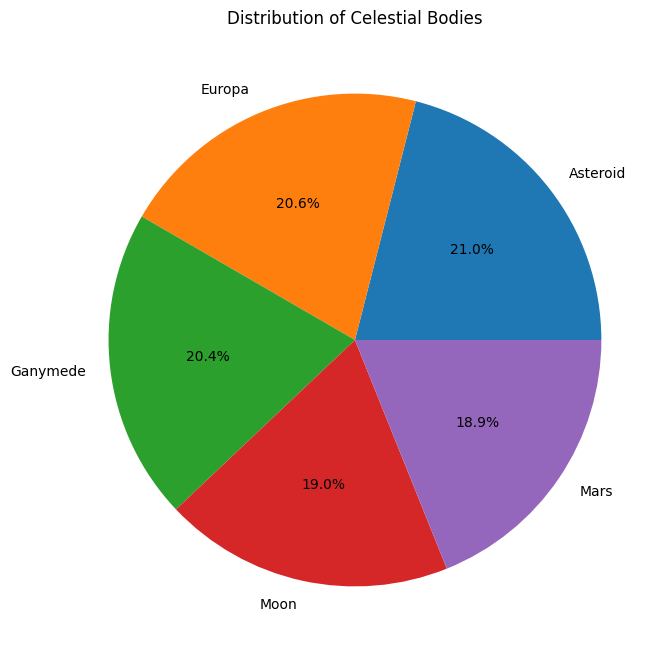

In [9]:
body_counts = df['Celestial Body'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(body_counts.values, labels=body_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Celestial Bodies')
plt.show()

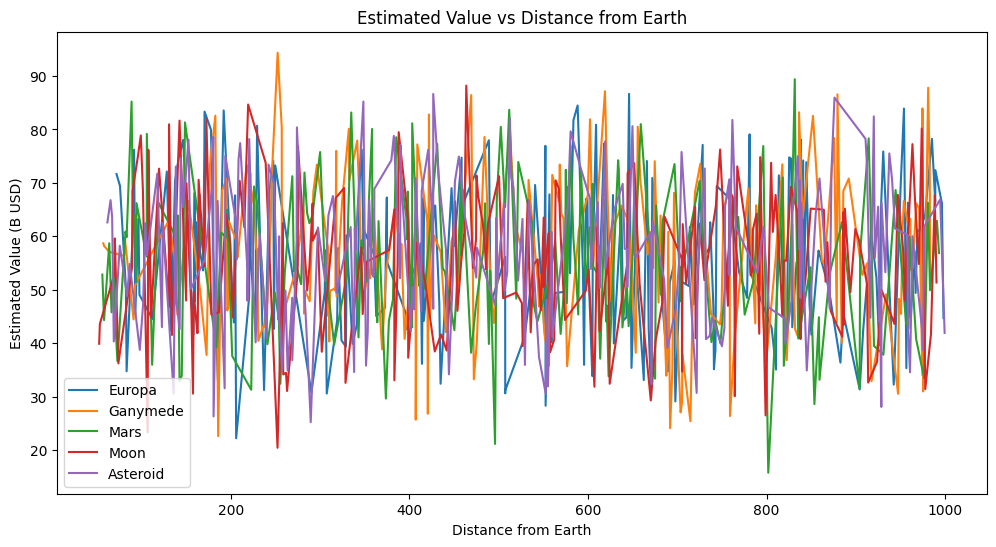

In [10]:
plt.figure(figsize=(12, 6))
for body in df['Celestial Body'].unique():
    body_data = df[df['Celestial Body'] == body].sort_values('distance_from_earth')
    plt.plot(body_data['distance_from_earth'], body_data['Estimated Value (B USD)'], label=body)

plt.title('Estimated Value vs Distance from Earth')
plt.xlabel('Distance from Earth')
plt.ylabel('Estimated Value (B USD)')
plt.legend()
plt.show()

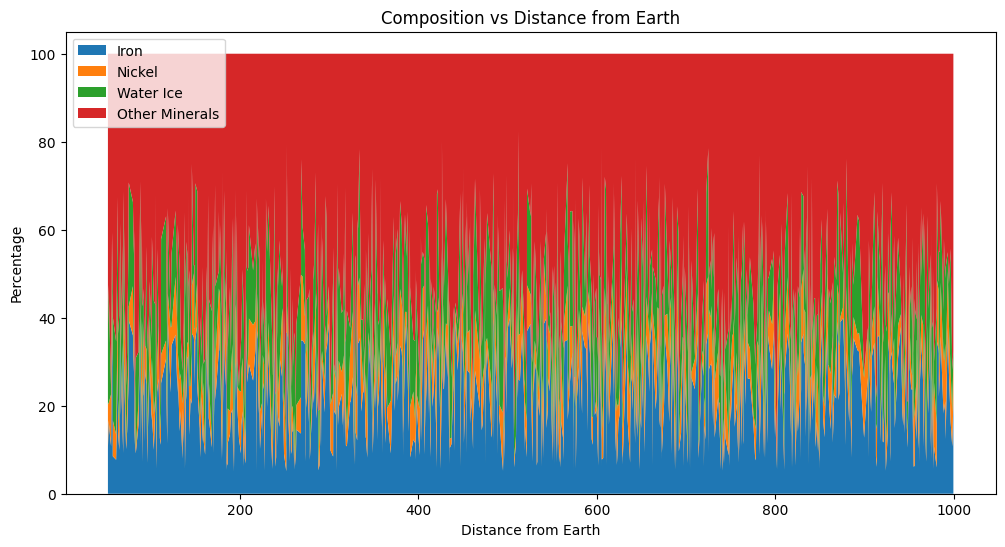

In [11]:
df_sorted = df.sort_values('distance_from_earth')
plt.figure(figsize=(12, 6))
plt.stackplot(df_sorted['distance_from_earth'],
              df_sorted['iron'],
              df_sorted['nickel'],
              df_sorted['water_ice'],
              df_sorted['other_minerals'],
              labels=['Iron', 'Nickel', 'Water Ice', 'Other Minerals'])
plt.title('Composition vs Distance from Earth')
plt.xlabel('Distance from Earth')
plt.ylabel('Percentage')
plt.legend(loc='upper left')
plt.show()

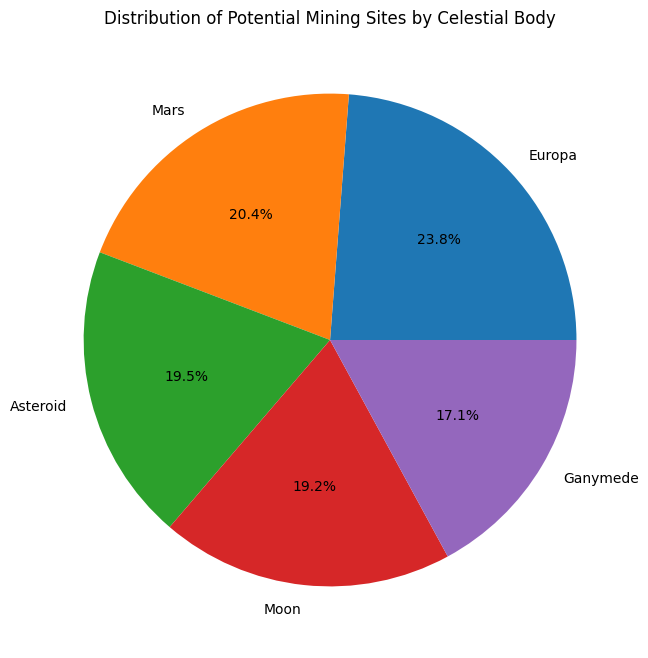

In [12]:
mining_sites = df[df['Potential Mining Site'] == True]['Celestial Body'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(mining_sites.values, labels=mining_sites.index, autopct='%1.1f%%')
plt.title('Distribution of Potential Mining Sites by Celestial Body')
plt.show()

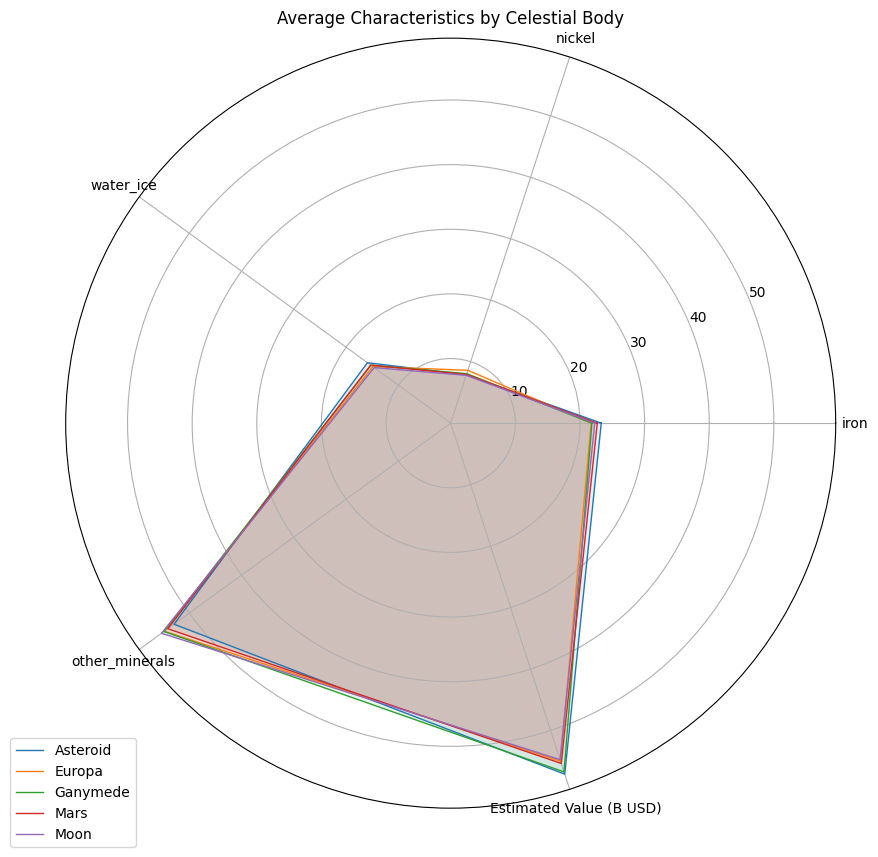

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average values for each celestial body
avg_values = df.groupby('Celestial Body')[['iron', 'nickel', 'water_ice', 'other_minerals', 'Estimated Value (B USD)']].mean()

# Number of variables
categories = list(avg_values.columns)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Draw one axis per variable + add labels
plt.xticks(angles[:-1], categories)

# Plot data
for body in avg_values.index:
    values = avg_values.loc[body].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=body)
    ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title("Average Characteristics by Celestial Body")
plt.show()